# DataCamp - Data Scientist Career Track (Python)

## Python Toolbox


In [4]:
# data_folder = "C:/Users/Utilizador/Dropbox/Python/ficheiros/DataCamp/DataCamp - Python Data Science Toolbox (Part 2)/"
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros/DataCamp - Python Data Science Toolbox (Part 2)/"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

##    CHAPTER 1  - Using iterators in PythonLand


#### Exercício 1 - Introduction to iterators

In [8]:
#vídeo
#Introduction to iterators

# iter() and next()

Exercício 2

In [10]:
#difference between an iterable and an iterator

Exercício 3

In [12]:
#Iterating over iterables (1)

flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

for item in flash:
    print(item)

superspeed = iter(flash)

print(next(superspeed))
print(next(superspeed))
print(next(superspeed))
print(next(superspeed))

jay garrick
barry allen
wally west
bart allen
jay garrick
barry allen
wally west
bart allen


Exercício 4

In [14]:
small_value = iter(range(3))

print(next(small_value))
print(next(small_value))
print(next(small_value))

# Loop over range(3) and print the values
for num in range(3):
    print(num)

print("======================================================")

googol = iter(range(10 ** 100))

print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))  # the computer doesn't crash, we can go on

0
1
2
0
1
2
0
1
2
3
4


Exercício 5

In [16]:
values = range(10, 21)
print(values)

print("=========================")

values_list = list(values)
print(values_list)

print("=========================")

values_sum = sum(values)
print(values_sum)

range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


#### Exercício 6 - Playing with iterators

In [18]:
#vídeo

#Playing with iterators

# enumerate(... , start=10)       zip()         


Exercício 7

In [20]:
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']

mutant_list = list(enumerate(mutants))
print(mutant_list)

print("=========================================")

for index1, value1 in enumerate(mutants):
    print(index1, value1)

print("=========================================")
    
# Change the start index
for index2, value2 in enumerate(mutants, start=1):  # para que n haja dúvidas, o charles xavier é o nº1 (telepathy)
    print(index2, value2)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


Exercício 8

In [22]:
#não dá para printar um zip,tem que se fazer uma iteração/for loop, descompactando-o
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']
aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers = ['telepathy','thermokinesis', 'teleportation', 'magnetokinesis','intangibility']

mutant_data = list(zip(mutants, aliases, powers))

# Print the list of tuples
print(mutant_data)

print("=========================================")
# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)
print(mutant_zip)

print("=========================================")
# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_data:
    print(value1, value2, value3)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


##### Exercício 9 - "unzip", unpacking

In [24]:
# There is no unzip function for doing the reverse of what zip() does.
# But, using *:

# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# Print the tuples in z1 by unpacking with *
print(*z1)

# Re-create a zip object from mutants and powers: z1  --> Because the previous print() call exhausted the elements in z1
z1 = zip(mutants, powers)

# "Unzip" the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

print("=========================================")
# Check if unpacked tuples are equivalent to original tuples
print(list(result1) == mutants)
print(list(result2) == powers)
print("=========================================")
print(result1)
print(mutants)


('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
True
True
('charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde')
['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']


#### Exercício 10 - Using iterators to load large files into memory

In [26]:
#vídeo
#Using iterators to load large files into memory

#Load the data in chunks

Exercício 11

In [28]:
# %%script false --no-raise-error
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv((data_folder + 'tweets.csv'), chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


Exercício 12

In [30]:
# Para ficar mais generalizado, podemos definir uma função nossa:

def count_entries(csv_file, c_size, colname):
    counts_dict = {}
    
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries((data_folder + 'tweets.csv'), 10, 'lang')

print(result_counts)


{'en': 97, 'et': 1, 'und': 2}


Exercício 13

In [32]:
#vídeo

# CHAPTER 2 - List comprehensions and generators

#### Exercício 1 - List comprehensions

In [35]:
#vídeo
#List comprehensions

Exercício 2

In [37]:
doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']

#produce a list of the first character of each string in doctor
print([i[0] for i in doctor])

['h', 'c', 'c', 't', 'w']


Exercício 3

In [39]:
# which of these can we build list comprehensions over?

doctor = ['house', 'cuddy', 'chase', 'thirteen', 'wilson']

range(50)

underwood = 'After all, we are nothing more or less than what we choose to reveal.'

jean = '24601'

flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

valjean = 24601

# Resposta: todos menos valjean

Exercício 4

In [41]:
# Write a list comprehension that produces a list of the squares of the numbers ranging from 0 to 9

squares = [i ** 2 for i in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Exercício 5

In [43]:
#Nested List comprehensions

matrix_1 = [[col for col in range(5)] for row in range(5)]
# [col for col in range(5)]

print(matrix_1)    #aqui é uma lista com as 'colunas' da matrix dentro
print("============================================================================================")

for row in matrix_1:
    print(row)        #aqui imprime a matriz, linha a linha


[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


#### Exercício 6 - Advanced comprehensions

In [45]:
#vídeo
#Advanced comprehensions

Exercício 7

In [47]:
# Using a list comprehension, create a list that only includes the members of fellowship that have 7 characters or more.
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

fellowship_seven = [member for member in fellowship if len(member) >= 7]

print(fellowship_seven)


['samwise', 'aragorn', 'legolas', 'boromir']


Exercício 8

In [49]:
# If-else --> list that keeps members of fellowship with >= 7 characters and replaces others with an empty string
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowship = [member if len(member) >= 7 else "" for member in fellowship]

print(new_fellowship)


['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


Exercício 9

In [51]:
#Dictionary comprehensions
#  Dictionary with the members of the list as the keys and the length of each string as the corresponding values
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

new_fellowship = {member: len(member) for member in fellowship}

print(new_fellowship)


# for member in fellowship:
#     new_fellowship[member] = len(member)
    
# print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


#### Exercício 10 - Introduction to generator expressions

In [53]:
#vídeo 
#generator expressions () ---> conhecido como "Lazy evaluation"
#generator functions

Exercício 11

In [55]:
# List
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# List comprehension
fellow1 = [member for member in fellowship if len(member) >= 7]

# Generator expression
fellow2 = (member for member in fellowship if len(member) >= 7)

print(fellow1)
print("===================================================")
print(fellow2)

['samwise', 'aragorn', 'legolas', 'boromir']
<generator object <genexpr> at 0x13e5f25e0>


Exercício 12

In [57]:
result = (num for num in range(15))   #Generator

# First 5 values
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print("==============================================")
# Print the rest of the values
for value in result:
    print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Exercício 13

In [59]:
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Create a generator object: lengths
lengths = (len(person) for person in lannister)

# Iterate over and print the values in lengths
for value in lengths:
    print(value)

6
5
5
6
7


Exercício 14

In [61]:
# Generator functions - yield

#Goal:
lengths = (len(person) for person in lannister)

lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# """Generator function that yields the length of the strings in input_list."""
def get_lengths(input_list):
    for person in input_list:
        yield len(person)

for value in get_lengths(lannister):
    print(value)


6
5
5
6
7


#### Exercício 15 - Wrapping up comprehensions and generators

In [63]:
#vídeo
#Wrapping up comprehensions and generators

Exercício 16

In [65]:
df = pd.read_csv(data_folder + 'tweets.csv')

# Extract the column 'created_at' from df
tweet_time = df["created_at"]

#Each row in df["created_at"] is a string that represents a timestamp. Access the 12th to 19th characters to extract the time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

# Print the extracted times
print(tweet_clock_time[0:40])

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18']


Exercício 17

In [67]:
# add a conditional expression that checks whether entry[17:19] is equal to '19'

tweet_clock_time = [entry[11:19] for entry in df["created_at"] if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


# Chapter 3 - Bringing it all together

Exercício 1 - welcome to the case study

In [70]:
#vídeo

Exercício 2

In [72]:
df_wb = pd.read_csv(data_folder + 'world_ind_pop_data.csv')

feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']

zipped_lists = zip(feature_names, row_vals)

rs_dict = dict(zipped_lists)

print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


Exercício 3

In [74]:
# repeat the process above for all the rows in the data

def lists2dict(list1, list2):
    """Return a dictionary where list1 provides the keys and list2 provides the values."""

    zipped_lists = zip(list1, list2)

    rs_dict = dict(zipped_lists)

    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


Exercício 4

In [76]:
#apply to a list of lists (row_lists), a segment of the dataframe

feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_lists = [['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298'],['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547'],['Arab World', 'ARB', 'Age dependency ratio, old (% of working-age population)', 'SP.POP.DPND.OL', '1960', '6.634579191565161'],['Arab World', 'ARB', 'Age dependency ratio, young (% of working-age population)', 'SP.POP.DPND.YG', '1960', '81.02332950839141'],['Arab World', 'ARB', 'Arms exports (SIPRI trend indicator values)', 'MS.MIL.XPRT.KD', '1960', '3000000.0'],['Arab World', 'ARB', 'Arms imports (SIPRI trend indicator values)', 'MS.MIL.MPRT.KD', '1960', '538000000.0'],['Arab World', 'ARB', 'Birth rate, crude (per 1,000 people)', 'SP.DYN.CBRT.IN', '1960', '47.697888095096395'],['Arab World', 'ARB', 'CO2 emissions (kt)', 'EN.ATM.CO2E.KT', '1960', '59563.9892169935'],['Arab World', 'ARB', 'CO2 emissions (metric tons per capita)', 'EN.ATM.CO2E.PC', '1960', '0.6439635478877049'],['Arab World', 'ARB', 'CO2 emissions from gaseous fuel consumption (% of total)', 'EN.ATM.CO2E.GF.ZS', '1960', '5.041291753975099'],['Arab World', 'ARB', 'CO2 emissions from liquid fuel consumption (% of total)', 'EN.ATM.CO2E.LF.ZS', '1960', '84.8514729446567'],['Arab World', 'ARB', 'CO2 emissions from liquid fuel consumption (kt)', 'EN.ATM.CO2E.LF.KT', '1960', '49541.707291032304'],['Arab World', 'ARB', 'CO2 emissions from solid fuel consumption (% of total)', 'EN.ATM.CO2E.SF.ZS', '1960', '4.72698138789597'],['Arab World', 'ARB', 'Death rate, crude (per 1,000 people)', 'SP.DYN.CDRT.IN', '1960', '19.7544519237187'],['Arab World', 'ARB', 'Fertility rate, total (births per woman)', 'SP.DYN.TFRT.IN', '1960', '6.92402738655897'],['Arab World', 'ARB', 'Fixed telephone subscriptions',  'IT.MLT.MAIN', '1960', '406833.0'],['Arab World', 'ARB', 'Fixed telephone subscriptions (per 100 people)', 'IT.MLT.MAIN.P2', '1960', '0.6167005703199'],['Arab World', 'ARB', 'Hospital beds (per 1,000 people)', 'SH.MED.BEDS.ZS', '1960', '1.9296220724398703'],['Arab World', 'ARB', 'International migrant stock (% of population)', 'SM.POP.TOTL.ZS', '1960', '2.9906371279862403'],['Arab World', 'ARB', 'International migrant stock, total', 'SM.POP.TOTL', '1960', '3324685.0']]

print(row_lists[0])
print(row_lists[1])
print("===========================================================================================================================")
print("===========================================================================================================================")

# criar uma lista de dicionários tendo em conta a lista row_lists disponível
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]


print(list_of_dicts[0])
print("===========================================================================================================================")
print(list_of_dicts[1])

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


Exercício 5

In [78]:
# passar tudo isto para uma dataframe

list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

df = pd.DataFrame(list_of_dicts)

df.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.56090740552298
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.7976011532547
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579191565161
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.02332950839141
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.0


#### Exercício 6 - Using Python generators for streaming data

In [80]:
#vídeo

Exercício 7

In [82]:
#Processing data in chunks (1)

df_wb = pd.read_csv(data_folder + 'world_ind_pop_data.csv')

with open(data_folder + 'world_ind_pop_data.csv') as file:        #------> with is the 'context manager'

    # Skip the column names
    file.readline()             #The method readline() reads one entire line from the file.

    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        first_col = line[0]    # (onde estão os nomes)

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)   # quantas vezes cada país aparece nas 1000 linhas

counts_dict['Portugal']
# vvv = list(counts_dict.values())[-5:]
# kkk = list(counts_dict.keys())[-5:]
# plt.bar(kkk, vvv)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

4

Exercício 8

In [84]:
# Writing a generator to load data in chunks (2)

def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    while True:

        data = file_object.readline()        #lê uma linha do file_object

        # Break if this is the end of the file
        if not data:
            break
            
        yield data

  ###########################################################################################
      
# Open a connection to the file
with open(data_folder + 'world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = (read_large_file(file))

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))
    
# Since a file object is already a generator, you don't have to explicitly create a generator object with your 
# read_large_file() function.

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652



Exercício 9

In [86]:
# Writing a generator to load data in chunks (3)

def read_large_file(file_object):
    while True:
        data = file_object.readline()        
        if not data:
            break
        
        yield data

print(read_large_file(data_folder + 'world_ind_pop_data.csv'))
print("===================================================================================================")
#############################################################################################################

#Process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the df
# For this exercise, however, you won't process just 1000 rows of data, but the entire dataset

############################################################################################################

counts_dict = {}

with open(data_folder + 'world_ind_pop_data.csv') as file:

    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

            
counts_dict

<generator object read_large_file at 0x16a105540>


{'CountryName': 1,
 'Arab World': 55,
 'Caribbean small states': 55,
 'Central Europe and the Baltics': 55,
 'East Asia & Pacific (all income levels)': 55,
 'East Asia & Pacific (developing only)': 55,
 'Euro area': 55,
 'Europe & Central Asia (all income levels)': 55,
 'Europe & Central Asia (developing only)': 55,
 'European Union': 55,
 'Fragile and conflict affected situations': 55,
 'Heavily indebted poor countries (HIPC)': 55,
 'High income': 55,
 'High income: nonOECD': 55,
 'High income: OECD': 55,
 'Latin America & Caribbean (all income levels)': 55,
 'Latin America & Caribbean (developing only)': 55,
 'Least developed countries: UN classification': 55,
 'Low & middle income': 55,
 'Low income': 55,
 'Lower middle income': 55,
 'Middle East & North Africa (all income levels)': 55,
 'Middle East & North Africa (developing only)': 55,
 'Middle income': 55,
 'North America': 55,
 'OECD members': 55,
 'Other small states': 55,
 'Pacific island small states': 55,
 'Small states': 5

#### Exercício 10 - Using pandas read_csv iterator for streaming data

In [88]:
#vídeo

Exercício 11

In [90]:
df_wb = pd.read_csv(data_folder + 'world_ind_pop_data.csv')

import pandas as pd

df_reader = pd.read_csv(data_folder + 'world_ind_pop_data.csv', chunksize=10)

next(df_reader)  #vem em chunks de 10


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679
5,Euro area,EMU,1960,2.653965e+08,62.096947
6,Europe & Central Asia (all income levels),ECS,1960,6.674890e+08,55.378977
7,Europe & Central Asia (developing only),ECA,1960,1.553174e+08,38.066129
8,European Union,EUU,1960,4.094985e+08,61.212898
9,Fragile and conflict affected situations,FCS,1960,1.203546e+08,17.891972


Exercício 12

In [92]:
# Initialize reader object: urb_pop_reader
df_reader_2 = pd.read_csv(data_folder + 'world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(df_reader_2)

# Check out the head of df_urb_pop

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

# df_urb_pop.head()
df_pop_ceb.head()

[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
2,Central Europe and the Baltics,CEB,1960,91401583.0,44.507921
244,Central Europe and the Baltics,CEB,1961,92237118.0,45.206665
486,Central Europe and the Baltics,CEB,1962,93014890.0,45.866565
728,Central Europe and the Baltics,CEB,1963,93845749.0,46.534093
970,Central Europe and the Baltics,CEB,1964,94722599.0,47.208743


Exercício 13

[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/2619561098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(entry[0]*entry[1]/100) for entry in pops_list]   #create a new column with the urbpop


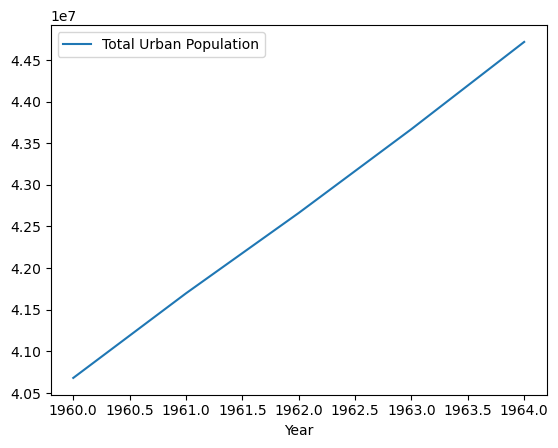

In [94]:
# using a list comprehension, create the values for a NEW COLUMN 'Total Urban Population'

df_reader_2 = pd.read_csv(data_folder + 'world_ind_pop_data.csv', chunksize=1000)  #load the data
df_urb_pop = next(df_reader_2)  # pick the first chunk of 1000
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']  # filter the countries with country code == 'CEB' on that chunk
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])  #zip the total pop and urban pop of that
pops_list = list(pops)  #unpack it, so that it can be analyzed

print(pops_list)
######################################################################################################################

df_pop_ceb['Total Urban Population'] = [int(entry[0]*entry[1]/100) for entry in pops_list]   #create a new column with the urbpop


import matplotlib.pyplot as plt
#plot
df_pop_ceb.plot(kind='line', x='Year', y='Total Urban Population')
plt.show()

Exercício 14

/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/1722677591.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]  #adicionar nova coluna, urbpop
/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/1722677591.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]  #adicionar nova coluna, urbpop
/var/folde

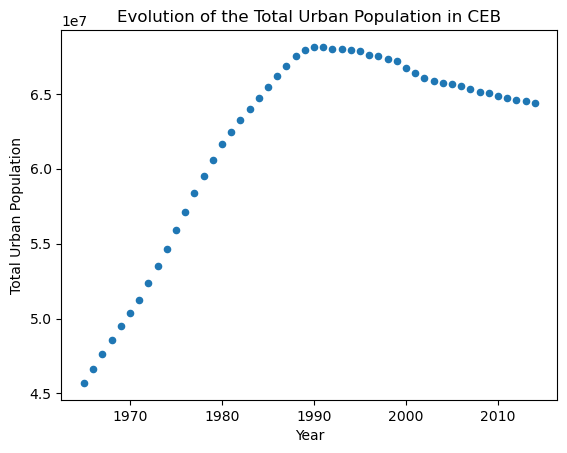

In [96]:
# Agora usando o ficheiro todo, criando um dataFrame com os dados para esse countrycode, 'CEB'


df_reader_2 = pd.read_csv(data_folder + 'world_ind_pop_data.csv', chunksize=1000)
df_urb_pop = next(df_reader_2)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in df_reader_2:   #para cada chunk de 1000 no ficheiro,

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']  #filtrar os CountryCode que são 'CEB'

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])  #zipá-los

    # Turn zip object into list: pops_list
    pops_list = list(pops)   #unpack

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]  #adicionar nova coluna, urbpop
    
    # Append DataFrame chunk to data: data
    # data = data.append(df_pop_ceb)
    data = pd.concat([data, df_pop_ceb])

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.title("Evolution of the Total Urban Population in CEB")
plt.show()


Exercício 15

/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/1472266368.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/1472266368.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/147226636

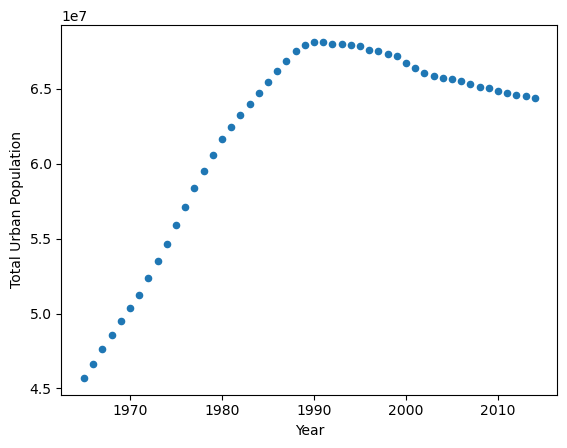

/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/1472266368.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/1472266368.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/36/syp262nj0bq8s2vgsyhjkc4w0000gn/T/ipykernel_21379/147226636

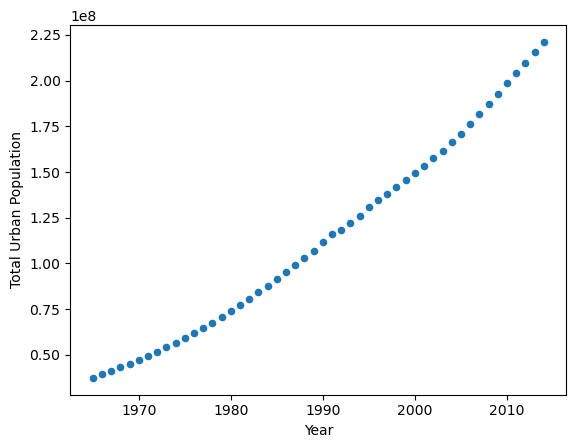

In [98]:
# construir uma função geral(ficheiro, countrycode)

def plot_pop(filename, country_code):

    df_reader_x = pd.read_csv(filename, chunksize=1000)
    df_urb_pop = next(df_reader_x)
    
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in df_reader_x:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        # data = data.append(df_pop_ceb)  #vai adicionando o filtro definido chunk a chunk
        data = pd.concat([data, df_pop_ceb])  #vai adicionando o filtro definido chunk a chunk

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()


# Call plot_pop for country code 'CEB'
plot_pop((data_folder + 'world_ind_pop_data.csv'), 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop((data_folder + 'world_ind_pop_data.csv'), 'ARB')


Exercício 16

In [100]:
#vídeo

# Fim